# Borrador Rodrigo

In [30]:
#Importacion de librerias/módulos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
#Establezco la dirección del archivo
file_location='properatti.csv'

#Leo el data set
datos_crudos=pd.read_csv(file_location)

#Visualizo las primeras filas
display(datos_crudos.head(3))


,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...


In [32]:
datos_crudos.iloc[:, 4] # Selecciono segunda columna place_with_parent_names

0                     |Argentina|Capital Federal|Mataderos|
1               |Argentina|Bs.As. G.B.A. Zona Sur|La Plata|
2                     |Argentina|Capital Federal|Mataderos|
3                       |Argentina|Capital Federal|Liniers|
4         |Argentina|Buenos Aires Costa Atlántica|Mar de...
                                ...                        
121215                 |Argentina|Capital Federal|Belgrano|
121216    |Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...
121217            |Argentina|Capital Federal|Villa Urquiza|
121218    |Argentina|Buenos Aires Costa Atlántica|Mar de...
121219                          |Argentina|Capital Federal|
Name: place_with_parent_names, Length: 121220, dtype: object

In [33]:
ubicacion = datos_crudos["place_with_parent_names"].str.split('|', expand=True) # Separo en varias columnas
ubicacion

,0,1,2,3,4,5,6
0,,Argentina,Capital Federal,Mataderos,,None,None
1,,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,,None,None
2,,Argentina,Capital Federal,Mataderos,,None,None
3,,Argentina,Capital Federal,Liniers,,None,None
4,,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,Centro,,None
...,...,...,...,...,...,...,...
121215,,Argentina,Capital Federal,Belgrano,,None,None
121216,,Argentina,Bs.As. G.B.A. Zona Norte,San Isidro,Beccar,,None
121217,,Argentina,Capital Federal,Villa Urquiza,,None,None
121218,,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,Plaza Colón,,None


In [34]:
pais = ubicacion.iloc[:, 1] # Creamos la columna Pais
pais


0         Argentina
1         Argentina
2         Argentina
3         Argentina
4         Argentina
            ...    
121215    Argentina
121216    Argentina
121217    Argentina
121218    Argentina
121219    Argentina
Name: 1, Length: 121220, dtype: object

In [35]:
ciudad = ubicacion.iloc[:, 2] # Creamos la columna Ciudad
ciudad

0                      Capital Federal
1               Bs.As. G.B.A. Zona Sur
2                      Capital Federal
3                      Capital Federal
4         Buenos Aires Costa Atlántica
                      ...             
121215                 Capital Federal
121216        Bs.As. G.B.A. Zona Norte
121217                 Capital Federal
121218    Buenos Aires Costa Atlántica
121219                 Capital Federal
Name: 2, Length: 121220, dtype: object

In [36]:
barrio = ubicacion.iloc[:,3] # Creamos la columna barrio
barrio

0             Mataderos
1              La Plata
2             Mataderos
3               Liniers
4         Mar del Plata
              ...      
121215         Belgrano
121216       San Isidro
121217    Villa Urquiza
121218    Mar del Plata
121219                 
Name: 3, Length: 121220, dtype: object

In [37]:
ubicacion_limpia = pd.concat([pais, ciudad, barrio], axis=1) # Creamos el dataset con las 3 columnas
ubicacion_limpia

,1,2,3
0,Argentina,Capital Federal,Mataderos
1,Argentina,Bs.As. G.B.A. Zona Sur,La Plata
2,Argentina,Capital Federal,Mataderos
3,Argentina,Capital Federal,Liniers
4,Argentina,Buenos Aires Costa Atlántica,Mar del Plata
...,...,...,...
121215,Argentina,Capital Federal,Belgrano
121216,Argentina,Bs.As. G.B.A. Zona Norte,San Isidro
121217,Argentina,Capital Federal,Villa Urquiza
121218,Argentina,Buenos Aires Costa Atlántica,Mar del Plata


In [38]:
ubicacion_limpia.columns =['pais', 'ciudad', 'barrio'] # Cambiamos los nombres de cada columna
ubicacion_limpia

,pais,ciudad,barrio
0,Argentina,Capital Federal,Mataderos
1,Argentina,Bs.As. G.B.A. Zona Sur,La Plata
2,Argentina,Capital Federal,Mataderos
3,Argentina,Capital Federal,Liniers
4,Argentina,Buenos Aires Costa Atlántica,Mar del Plata
...,...,...,...
121215,Argentina,Capital Federal,Belgrano
121216,Argentina,Bs.As. G.B.A. Zona Norte,San Isidro
121217,Argentina,Capital Federal,Villa Urquiza
121218,Argentina,Buenos Aires Costa Atlántica,Mar del Plata


In [39]:
ubicacion_limpia.isna().sum() # Verificamos si hay nulos

pais      0
ciudad    0
barrio    0
dtype: int64

In [40]:
n = len(pd.unique(ubicacion_limpia['pais'])) # Contar cuantos paises hay en el dataset
  
print(n)

(ubicacion_limpia['pais']).value_counts()

1


Argentina    121220
Name: pais, dtype: int64

Podemos sacar la columna pais ya que hay 1 solo valor

In [73]:
n = len(pd.unique(ubicacion_limpia['ciudad'])) # Contar cuantas ciudades hay en el dataset
  
print (n)

(ubicacion_limpia['ciudad']).value_counts()


28


Capital Federal                 32316
Bs.As. G.B.A. Zona Norte        25560
Bs.As. G.B.A. Zona Sur          13952
Córdoba                         12069
Santa Fe                        10172
Buenos Aires Costa Atlántica    10006
Bs.As. G.B.A. Zona Oeste         9322
Buenos Aires Interior            2291
Río Negro                         808
Neuquén                           733
Mendoza                           681
Tucumán                           674
Corrientes                        583
Misiones                          464
Entre Ríos                        369
Salta                             278
Chubut                            259
San Luis                          252
La Pampa                          157
Formosa                            65
Chaco                              57
San Juan                           40
Tierra Del Fuego                   31
Catamarca                          27
Jujuy                              26
Santa Cruz                         20
Santiago Del

(array([[121220.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0.,      0.],
        [121220.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0.,      0.],
        [ 68106.,  39624.,   6899.,   3143.,   1506.,    832.,    471.,
            149.,    347.,    143.]]),
 array([  0. ,  55.7, 111.4, 167.1, 222.8, 278.5, 334.2, 389.9, 445.6,
        501.3, 557. ]),
 <a list of 3 BarContainer objects>)

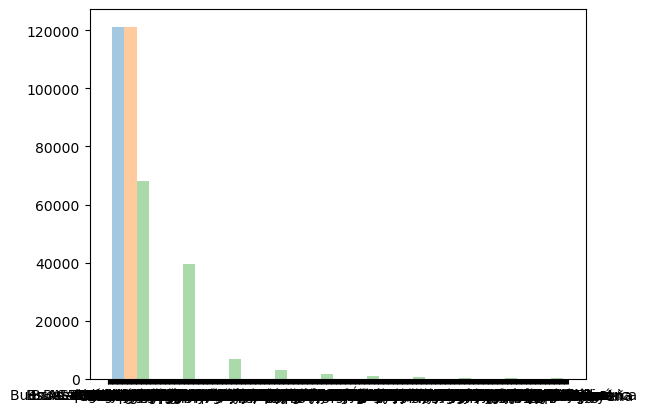

In [71]:
#Visualizamos porcentajes de nulos por columna en un histo

#creo una figura
fig = plt.figure()
# creo los axes
ax = plt.axes()
# dibujo en axes:
ax.hist(prueba, label='Porcentaje de Nulos por Columna', alpha = 0.4)

In [63]:
n = len(pd.unique(ubicacion_limpia['barrio'])) # Contar cuantos barrios hay en el dataset
  
print(n)

(ubicacion_limpia['barrio']).value_counts()

539


Tigre            8983
Rosario          8504
Mar del Plata    7710
Córdoba          6606
                 4780
                 ... 
Sunchales           1
San Antonio         1
Serodino            1
Sarmiento           1
Malabrigo           1
Name: barrio, Length: 539, dtype: int64

In [43]:
ubicacion_limpia.to_csv('ubicacion_limpia.csv') # Creamos el nuevo archivo con las columnas limpias